<a href="https://colab.research.google.com/github/Diegogp95/mineria/blob/main/Test_Mineria_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook test para la integración con GitHub

https://drive.google.com/file/d/1SDD1WNGWsk7QR_2bumYvq6_4XViTA4Vf/view?usp=sharing 

In [1]:
%%shell
# STATIONS DATA
# download the Custom dataset from created Drive folder. 
wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SDD1WNGWsk7QR_2bumYvq6_4XViTA4Vf' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1SDD1WNGWsk7QR_2bumYvq6_4XViTA4Vf" -O cr2_prDaily_2018_stations_ghcn.csv && rm -rf /tmp/cookies.txt

--2023-06-06 21:10:14--  https://docs.google.com/uc?export=download&confirm=&id=1SDD1WNGWsk7QR_2bumYvq6_4XViTA4Vf
Resolving docs.google.com (docs.google.com)... 173.194.203.138, 173.194.203.101, 173.194.203.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6dgs19vtom7j4714l1gdrtge1kc2ne52/1686085800000/10249583459744317057/*/1SDD1WNGWsk7QR_2bumYvq6_4XViTA4Vf?e=download&uuid=08c21463-3032-4228-a26f-d0c7dfb7d567 [following]
--2023-06-06 21:10:14--  https://doc-0k-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6dgs19vtom7j4714l1gdrtge1kc2ne52/1686085800000/10249583459744317057/*/1SDD1WNGWsk7QR_2bumYvq6_4XViTA4Vf?e=download&uuid=08c21463-3032-4228-a26f-d0c7dfb7d567
Resolving doc-0k-30-docs.googleusercontent.com (doc-0k-30-docs.googleusercontent.com)... 173.194.202.1

In [2]:
%%shell
# PRECIPITATION DATA
# download the Custom dataset from created Drive folder
wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15ms0oNEoWsugyLUiCZkcD_6hOpnPRMFi' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15ms0oNEoWsugyLUiCZkcD_6hOpnPRMFi" -O cr2_prDaily_2018ghcn.csv && rm -rf /tmp/cookies.txt

--2023-06-06 21:10:15--  https://docs.google.com/uc?export=download&confirm=t&id=15ms0oNEoWsugyLUiCZkcD_6hOpnPRMFi
Resolving docs.google.com (docs.google.com)... 173.194.203.138, 173.194.203.101, 173.194.203.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uiok2jlrtjj2q3g3anf901l668vaufe4/1686085800000/10249583459744317057/*/15ms0oNEoWsugyLUiCZkcD_6hOpnPRMFi?e=download&uuid=51087e46-ea45-47d7-bd68-f80dca9ce5f1 [following]
--2023-06-06 21:10:15--  https://doc-08-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uiok2jlrtjj2q3g3anf901l668vaufe4/1686085800000/10249583459744317057/*/15ms0oNEoWsugyLUiCZkcD_6hOpnPRMFi?e=download&uuid=51087e46-ea45-47d7-bd68-f80dca9ce5f1
Resolving doc-08-30-docs.googleusercontent.com (doc-08-30-docs.googleusercontent.com)... 173.194.202.

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/cr2_prDaily_2018_stations_ghcn.csv")
df_precip = pd.read_csv("/content/cr2_prDaily_2018ghcn.csv")

<ipython-input-3-70204c6d4991>:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263

In [4]:
df_precip.head(20)

,codigo_estacion,01000005,01200002,01200003,01201005,01201010,01201003,01001005,01110001,01202009,...,AYM00089664,AYW00067601,AYM00089606,AYW00067401,AYW00077401,AYW00068201,AYW00068701,AYW00088703,AYW00088702,AYW00090001
0,institucion,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA,...,GHCN,GHCN,GHCN,GHCN,GHCN,GHCN,GHCN,GHCN,GHCN,GHCN
1,fuente,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,...,ghcn_ftp,ghcn_ftp,ghcn_ftp,ghcn_ftp,ghcn_ftp,ghcn_ftp,ghcn_ftp,ghcn_ftp,ghcn_ftp,ghcn_ftp
2,nombre,Visviri,Villa Industrial (Tacora),Humapalca,Rio Caracarani En Humapalca,Alcerreca,Rio Lluta En Alcerreca,Caquena,Puquios,Pacollo,...,Mcmurdo Sound Naf,Little America,Vostok,Little Rockford,Plateau Stn,Byrd Stn,Brockton Stn,Little Jeana Stn,Beardmore Camp,Amundsen-Scott
3,altura,4080,4080,3980,3908,3990,3550,4400,3750,4185,...,24,32,3488,651,3505,1543,101,54,59,-1000
4,latitud,-17.595,-17.7719,-17.835,-17.8428,-17.9931,-18.0036,-18.0542,-18.1747,-18.1769,...,-77.8833,-78.2,-78.45,-79.25,-79.4667,-80.0167,-80.0167,-81.3833,-83.4,-90.0
5,longitud,-69.4831,-69.7244,-69.7039,-69.6994,-69.6594,-69.6331,-69.2017,-69.7439,-69.5092,...,166.733,-162.25,106.867,-147.5,40.5833,-119.533,-178.417,170.75,174.75,0.0
6,codigo_cuenca,10,12,12,12,12,12,10,11,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,nombre_cuenca,Altiplanicas,Rio Lluta,Rio Lluta,Rio Lluta,Rio Lluta,Rio Lluta,Altiplanicas,Quebrada De La Concordia,Rio Lluta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,codigo_sub_cuenca,100,120,120,120,120,120,100,111,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,nombre_sub_cuenca,Entre Limite Peru-Bolivia Y Rio Lauca,Rio Lluta Alto,Rio Lluta Alto,Rio Lluta Alto,Rio Lluta Alto,Rio Lluta Alto,Entre Limite Peru-Bolivia Y Rio Lauca,Quebrada De La Concordia,Rio Lluta Alto,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones,inicio_automatica
0,1000005,DGA,dga_web,Visviri,4080,-17.5950,-69.4831,10.0,Altiplanicas,100.0,Entre Limite Peru-Bolivia Y Rio Lauca,1968-05-01,2018-03-09,17536,2016-08-01
1,1200002,DGA,dga_web,Villa Industrial (Tacora),4080,-17.7719,-69.7244,12.0,Rio Lluta,120.0,Rio Lluta Alto,1975-01-01,2017-03-31,14820,-
2,1200003,DGA,dga_web,Humapalca,3980,-17.8350,-69.7039,12.0,Rio Lluta,120.0,Rio Lluta Alto,1971-12-01,2017-03-31,16419,-
3,1201005,DGA,dga_web,Rio Caracarani En Humapalca,3908,-17.8428,-69.6994,12.0,Rio Lluta,120.0,Rio Lluta Alto,2013-06-01,2018-01-30,1489,2016-08-31
4,1201010,DGA,dga_web,Alcerreca,3990,-17.9931,-69.6594,12.0,Rio Lluta,120.0,Rio Lluta Alto,1971-01-01,2017-03-31,16589,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,AYW00068201,GHCN,ghcn_ftp,Byrd Stn,1543,-80.0167,-119.5330,NaN,NaN,NaN,NaN,1957-01-10,1988-01-31,5729,-
1245,AYW00068701,GHCN,ghcn_ftp,Brockton Stn,101,-80.0167,-178.4170,NaN,NaN,NaN,NaN,1966-01-01,1969-12-28,276,-
1246,AYW00088703,GHCN,ghcn_ftp,Little Jeana Stn,54,-81.3833,170.7500,NaN,NaN,NaN,NaN,1964-10-04,1966-01-22,226,-
1247,AYW00088702,GHCN,ghcn_ftp,Beardmore Camp,59,-83.4000,174.7500,NaN,NaN,NaN,NaN,1959-10-18,1963-02-28,417,-


In [6]:
df_precip.drop(df_precip.index[:14]).reset_index(drop=True).to_csv('data.csv', index=False)

In [7]:
df_data = pd.read_csv('data.csv')
df_data['codigo_estacion'] = pd.to_datetime(
    df_data['codigo_estacion'].astype(str),
    format='%Y-%m-%d')
df_data

,codigo_estacion,01000005,01200002,01200003,01201005,01201010,01201003,01001005,01110001,01202009,...,AYM00089664,AYW00067601,AYM00089606,AYW00067401,AYW00077401,AYW00068201,AYW00068701,AYW00088703,AYW00088702,AYW00090001
0,1900-01-01,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,1900-01-02,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,1900-01-03,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,1900-01-04,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,1900-01-05,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43162,2018-03-05,0.4,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,0.5,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
43163,2018-03-06,4.2,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,0.3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
43164,2018-03-07,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,0.3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
43165,2018-03-08,1.4,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_data.dtypes

codigo_estacion    datetime64[ns]
01000005                  float64
01200002                  float64
01200003                  float64
01201005                  float64
                        ...      
AYW00068201               float64
AYW00068701               float64
AYW00088703               float64
AYW00088702               float64
AYW00090001               float64
Length: 1250, dtype: object

In [9]:
df_data.isna().describe()

,codigo_estacion,01000005,01200002,01200003,01201005,01201010,01201003,01001005,01110001,01202009,...,AYM00089664,AYW00067601,AYM00089606,AYW00067401,AYW00077401,AYW00068201,AYW00068701,AYW00088703,AYW00088702,AYW00090001
count,43167,43167,43167,43167,43167,43167,43167,43167,43167,43167,...,43167,43167,43167,43167,43167,43167,43167,43167,43167,43167
unique,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,43167,43167,43167,43167,43167,43167,43167,43167,43167,43167,...,43165,43165,43165,43165,43165,43165,43165,43165,43165,43165


In [10]:
df_data = df_data.fillna(-9999.0)
df_data.isna().describe()

,codigo_estacion,01000005,01200002,01200003,01201005,01201010,01201003,01001005,01110001,01202009,...,AYM00089664,AYW00067601,AYM00089606,AYW00067401,AYW00077401,AYW00068201,AYW00068701,AYW00088703,AYW00088702,AYW00090001
count,43167,43167,43167,43167,43167,43167,43167,43167,43167,43167,...,43167,43167,43167,43167,43167,43167,43167,43167,43167,43167
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,43167,43167,43167,43167,43167,43167,43167,43167,43167,43167,...,43167,43167,43167,43167,43167,43167,43167,43167,43167,43167


In [11]:
df_data

,codigo_estacion,01000005,01200002,01200003,01201005,01201010,01201003,01001005,01110001,01202009,...,AYM00089664,AYW00067601,AYM00089606,AYW00067401,AYW00077401,AYW00068201,AYW00068701,AYW00088703,AYW00088702,AYW00090001
0,1900-01-01,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,1900-01-02,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,1900-01-03,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,1900-01-04,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,1900-01-05,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43162,2018-03-05,0.4,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,0.5,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
43163,2018-03-06,4.2,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,0.3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
43164,2018-03-07,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,0.3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
43165,2018-03-08,1.4,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [12]:
# We measure the sparsity of the dataset

count = (df_data.iloc[:, 1:] < -100).sum().sum()
sparsity = count/df_data.iloc[:, 1:].size

sparsity

0.8004672044443997

In [13]:
max_dims = df_data.shape

def get_sparsity(X, irow=0, icol=0, frow=(max_dims[0]-1), fcol=(max_dims[1]-1)):
  count = (X.iloc[irow : frow, icol : fcol] < -100).sum().sum()
  sparsity = count/X.iloc[irow : frow, icol : fcol].size
  return sparsity


In [14]:
import matplotlib.pyplot as plt

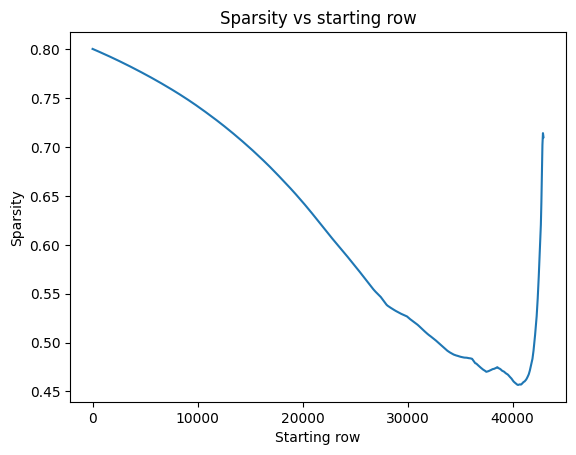

In [15]:
def plot_sparsity(X, step=50, frow=(max_dims[0]-1), icol=0):
  sparsity_arr = []
  initial_row_arr = [row for row in range(1,frow-200,step)]
  for ini in initial_row_arr:
    sparsity_arr.append(get_sparsity(X, irow=ini, icol=icol, frow=frow))
  plt.plot(initial_row_arr, sparsity_arr)
  plt.title('Sparsity vs starting row')
  plt.xlabel('Starting row')
  plt.ylabel('Sparsity')
  plt.show()
  return

plot_sparsity(df_data, icol=1)

In [16]:
import plotly.graph_objects as go
import plotly.express as px

In [17]:
fig = px.bar(df, x='codigo_estacion', y='cantidad_observaciones')
fig.show()

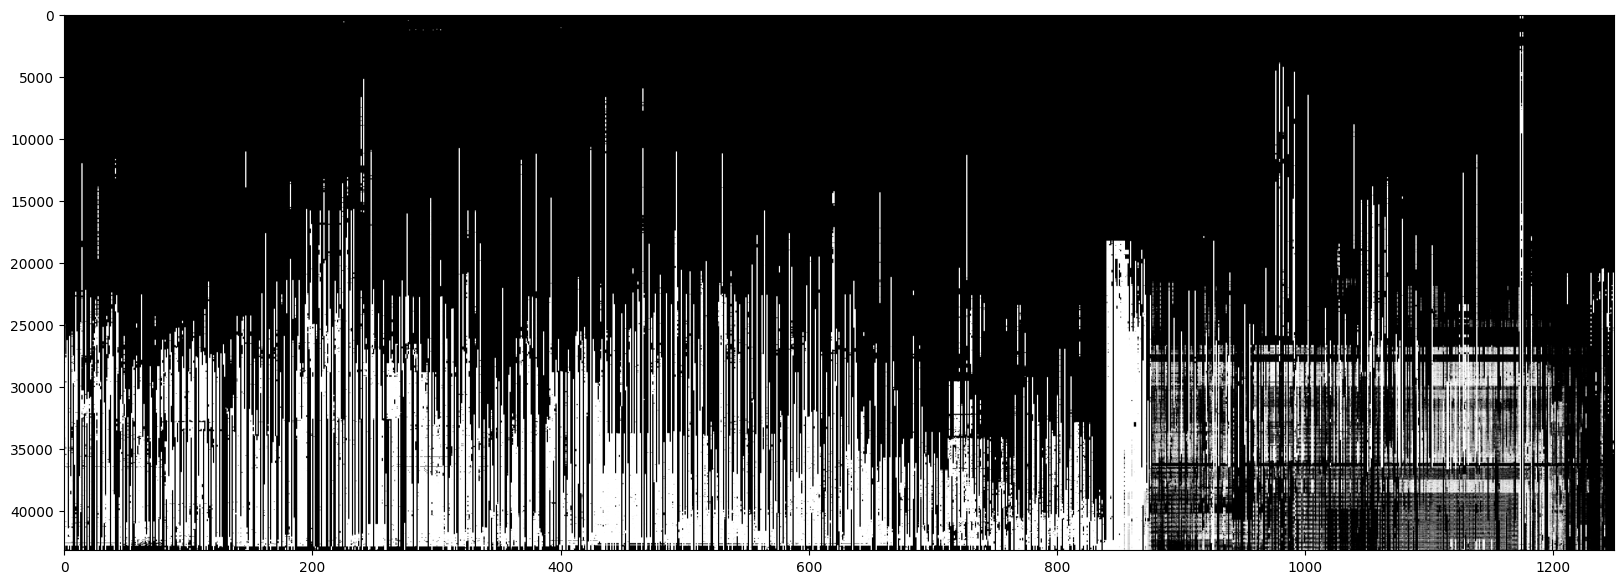

In [29]:
condition = df_data.iloc[:, 1:] > -100
binary_mask = condition.astype(int)
plt.figure(figsize=(20,60))
sparse_img = plt.imshow(binary_mask.values, cmap='gray',vmin=0, vmax=1, aspect=0.01)

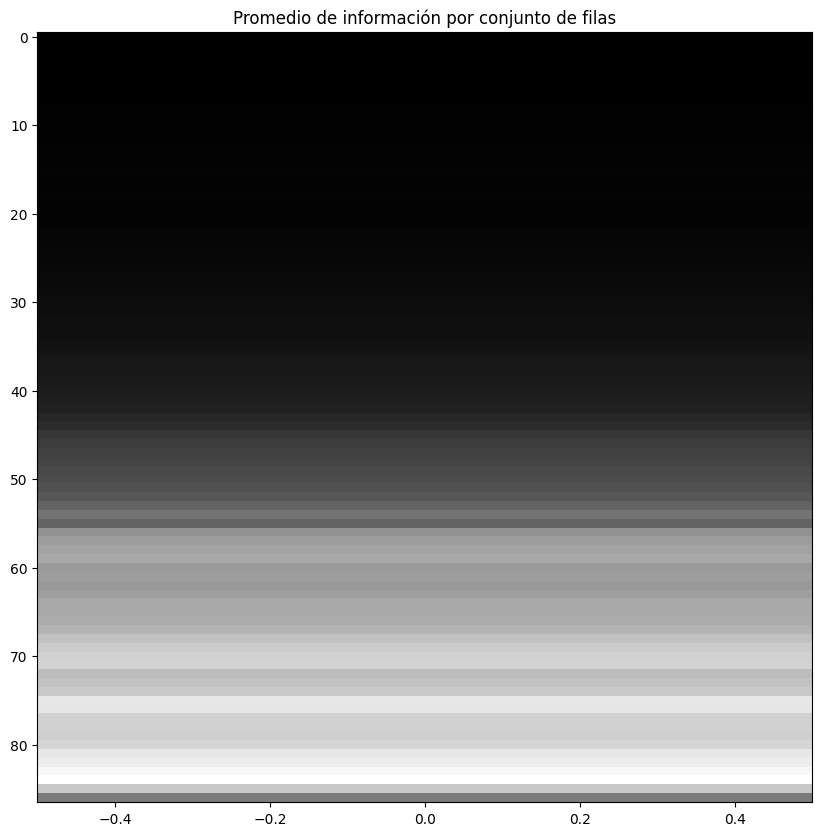

In [28]:
def row_avg_plot(X, rows_num=100):
  means = []
  
  for n in range(0, len(X), rows_num):
    means.append(X.iloc[n:n+rows_num,
                        :].mean().mean())
  plt.figure(figsize=(10,10))
  plt.title('Promedio de información por conjunto de filas')
  plt.imshow(np.reshape(means, (len(means), 1)), cmap='gray',
                      vmin=0, vmax=max(means), aspect='auto')

row_avg_plot(binary_mask,500)


Inicialmente nos basamos en un análisis visual de las proyecciones realizadas, se considera la idea de utilizar una métrica para definir un punto de partida para el dataset.

Hipotesis: Las partes densas de información e ininterrumpidas son pruducto del inicio de mediciones automáticas en las estaciones de medición. Ésto se puede ver especialmente en el bloque de las estaciones más australes de Chile.